# Part II - (Loan outcome dependencies for Prosper loan data)
## by (Olorunleke Akindote-White)

## Investigation Overview

> This presentation is aimed at revealing the influence of such factors as employment status, income range and borrower rate on the loan outcome. The first two factors are presented using a heat map while the third is presented using a boxplot.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

loans = pd.read_csv('prosperLoanData.csv')
loans_sub = loans[['LoanStatus','ListingCategory (numeric)','Term','BorrowerAPR','BorrowerRate','LenderYield','Occupation',
                 'EmploymentStatus','EmploymentStatusDuration','AvailableBankcardCredit','IncomeRange','MonthlyLoanPayment']]
loans_sub.columns = loans_sub.columns.str.lower()
loans_sub.rename({'listingcategory (numeric)':'listingcategory'},axis=1,inplace=True)
loans_sub['listingcategory'].replace({0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',
                                     3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
                                     7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                                     11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                                     14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                                     18:'Taxes',19:'Vacation',20:'Wedding Loans'},inplace=True)
loans_sub.dropna(inplace=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Loan status vs Employment status)

> This heatmap shows the interaction between Employment status and loan status and we see that employed individuals interact the most with loans given the color indication and count of profiles in the Employed and Full-time categories for current and completed loans.

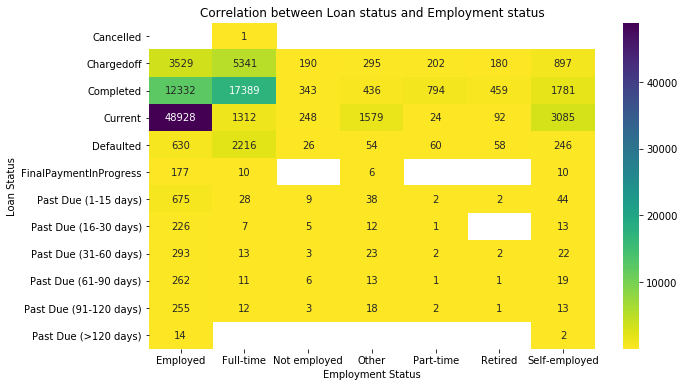

In [4]:
es_counts = loans_sub.groupby(['loanstatus', 'employmentstatus']).size()
es_counts = es_counts.reset_index(name='count')
es_counts = es_counts.pivot(index = 'loanstatus', columns = 'employmentstatus', values = 'count')
plt.figure(figsize=(10,6))
sb.heatmap(es_counts,annot = True, fmt = '.0f',cmap='viridis_r')
plt.xlabel('Employment Status')
plt.ylabel('Loan Status')
plt.title('Correlation between Loan status and Employment status');

## (Loan status vs income range)

> This heatmap shows the interaction between income range and loan status and we see that there is an increase in number of current loans across the heatmap from left to right and a drop off after the 75,000 USD mark. The trend is similar for completed loans up until the 50,000 USD mark after which there is a drop off.

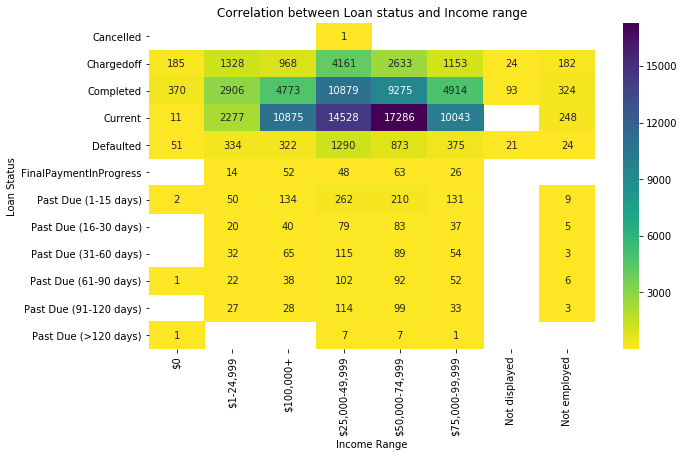

In [5]:
ls_counts = loans_sub.groupby(['loanstatus', 'incomerange']).size()
ls_counts = ls_counts.reset_index(name='count')
ls_counts = ls_counts.pivot(index = 'loanstatus', columns = 'incomerange', values = 'count')
plt.figure(figsize=(10,6))
sb.heatmap(ls_counts,annot = True, fmt = '.0f',cmap='viridis_r')
plt.xlabel('Income Range')
plt.ylabel('Loan Status')
plt.title('Correlation between Loan status and Income range');

## (Loan status vs borrower rate)
>This boxplot depicts the distribution of borrower rates per loan status category and we see that majority of the median borrower rates are around 0.23 (23%). In fact, only defaulted loans have an upaired median as it can be seen that completed, current and past due(91-120 days) loans share an approximately equal median. Regardless of loan status, we can state the borrower rates across all lenders to be between 0.17-0.23 (17%-23%) on average. Given the width of the distribution for completed loans, we see that most people lean more towards the lower boundary of the average borrower rate. Possibly for convenience and ease of repayment since these rates are consequently lower.

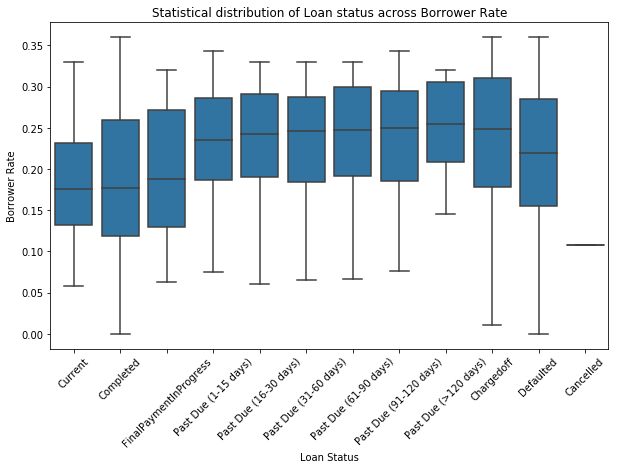

In [5]:
# specifying the default color palette
color = sb.color_palette()[0]
#-- retrieving the pandas version to isolate the digit before the decimal
pd_ver = pd.__version__.split(".")

#-- Loan Status in order of significance
loan_classes = ['Current','Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
                  'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
                'Past Due (>120 days)','Chargedoff', 'Defaulted','Cancelled']
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    ln_classes = pd.api.types.CategoricalDtype(ordered = True, categories = loan_classes)
    loans_sub['loanstatus'] = loans_sub['loanstatus'].astype(ln_classes)
else: # pre-v0.21
    loans_sub['loanstatus'] = loans_sub['loanstatus'].astype('category', ordered = True,categories = loan_classes)
# plotting
plt.figure(figsize=(10,6))
sb.boxplot('loanstatus','borrowerrate',data=loans_sub,color=color)
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=45)
plt.title('Statistical distribution of Loan status across Borrower Rate');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 440761 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
